In [14]:
import requests
import lxml.html as lh
import pandas as pd
from bs4 import BeautifulSoup
import random
from sqlalchemy import create_engine
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
res = requests.get('https://scrap-me.herokuapp.com/items')
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0] 
df = pd.read_html(str(table))
#df2=df[0].to_json(orient='records')

In [9]:
url='http://scrap-me.herokuapp.com/items?page='
numbers=[i for i in range(1,401)]
pages_urls=[]
for each in numbers:
    each= str(each)
    pages_urls.append(url+each)

In [10]:
df[0]
for each in random.sample(pages_urls,k=50):
    request = requests.get(each)
    soup = BeautifulSoup(request.content,'lxml')
    table = soup.find_all('table')[0] 
    df1 = pd.read_html(str(table))
    dfs=[df[0], df1[0]]
    df2 = pd.concat(dfs)
    df[0]=df2


In [11]:
df2.head()

,id,orderportalid,orderdate_gmt,designer,style,shipper,shiptypeid,userid,isvip,country,...,freereturn,issale,productid,brand,ddpsubcategory,storeid,countryoforigin,size,category_1stlevel,platform
0,b501152b1827b46f6c05f2465e45aa0f,52747,2018-01-08 13:45:35.773000+00:00,4757,4761,5,2,45300.0,Not VIP,16,...,1,Yes,4940,759,"Trousers, overalls, shorts",649,26,3,Clothing,web
1,26fd14051dc873ac679a9ada5ef98f72,41448,2018-01-08 00:39:58.636000+00:00,34874,34883,3,1,13498.0,Not VIP,1,...,1,No,38210,2,"T-shirts, singlets and other vests",46,4,27,Clothing,app
2,d8ad898b1a49eae0e60e6d5171f6d86c,312898,2018-02-18 07:25:06.546000+00:00,105610,105632,2,2,96454.0,VIP New,3,...,1,No,121178,155,"Jerseys, pullovers, cardigans, waistcoats and ...",284,4,19,Clothing,app
3,cd32a154a96c9d8ad477ece87a655005,241775,2018-02-04 11:25:50.236000+00:00,106885,106907,2,2,69001.0,Not VIP,4,...,1,No,122766,2196,Footwear with outer soles of rubber or plastics,36,1,356,Boys Shoes,web
4,a0d86abe2f9a44abecbabbef612c90c4,30605,2018-01-06 07:13:56.496000+00:00,21775,21783,2,2,7055.0,VIP New,5,...,1,Yes,23410,36,Articles of a kind normally carried in the poc...,8,1,17,Accessories,app


In [12]:
export_csv = df2.to_csv (r'C:\Users\mafal\Documents\GitHub\exported_WSdataframe.csv')

In [15]:
username = 'ldsa_student'
password = 'JGIYc6jD'  # the password is not XXX by the way
host_name = 'data-wrangling-batch3.cl9uj9cucww7.eu-west-1.rds.amazonaws.com'
port = 5432
db_name = 'datawrangling'
schema = 'hackathon_students'
conn_str = 'postgresql://{}:{}@{}:{}/{}'.format(username, password, host_name, port, db_name)
conn_args = {'options': '-csearch_path={}'.format(schema)}
engine = create_engine(conn_str, connect_args=conn_args)
query = "SELECT * FROM targets"
df_targets = pd.read_sql_query(query, engine)


In [16]:
df3 = pd.merge(df_targets, df2, on='id')
df3.head()

,id,returned,orderportalid,orderdate_gmt,designer,style,shipper,shiptypeid,userid,isvip,...,freereturn,issale,productid,brand,ddpsubcategory,storeid,countryoforigin,size,category_1stlevel,platform
0,a129972f0a83abf66dcbdad5c2dc8033,0,227712,2018-02-01 17:23:44.583000+00:00,12934,12941,2,2,166656.0,Not VIP,...,1,Yes,13691,1,Articles of a kind normally carried in the poc...,106,1,1,Accessories,app
1,fac3d60baee758d54893af6db364dba4,0,156471,2018-01-20 10:23:56.723000+00:00,81755,81775,2,2,120182.0,Not VIP,...,1,No,92293,20,Articles of a kind normally carried in the poc...,341,2,6,Homeware,web
2,a9b1cd75f0d5a32054d061fd64ee67f5,0,235206,2018-02-03 01:34:18.476000+00:00,2319,2322,2,2,92273.0,VIP,...,1,No,2385,107,"T-shirts, singlets and other vests",85,3,52,Clothing,web
3,0b3f332b5235f8412947be6f7ef5822a,1,51387,2018-01-08 12:44:24.613000+00:00,64389,64406,2,2,44223.0,VIP,...,1,Yes,71976,545,Footwear with outer soles of rubber or plastics,113,26,230,Shoes,NaN
4,d6596a0412050bd496e00088ebc7d556,0,309997,2018-02-17 16:10:45.100000+00:00,132320,132350,3,11,216192.0,Not VIP,...,1,No,154370,92,"Jerseys, pullovers, cardigans, waistcoats and ...",1194,1,2,Clothing,NaN


In [17]:
df4= df3.drop(columns=['orderportalid', 'orderdate_gmt', 'designer', 'style', 'shiptypeid', 'userid', 'productid', 'ddpsubcategory', 'shipper' ])
df4.columns

Index(['id', 'returned', 'isvip', 'country', 'region', 'ddprate',
       'countrycode', 'hasusedwishlist', 'isreseller', 'hasitemsonbag',
       'tierafterorder', 'tierbeforeorder', 'isusingmultipledevices',
       'userfraudstatus', 'promocode', 'freereturn', 'issale', 'brand',
       'storeid', 'countryoforigin', 'size', 'category_1stlevel', 'platform'],
      dtype='object')

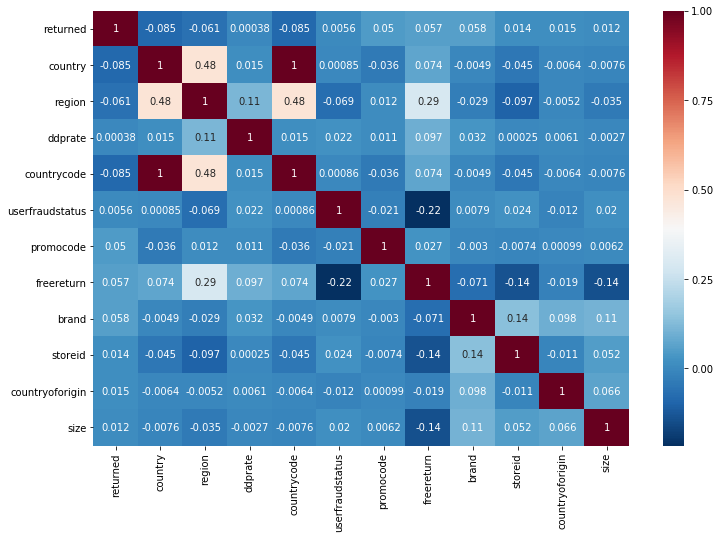

In [18]:
plt.figure(figsize = (12,8)) 

sns.heatmap(df4.corr(), 
            annot=True,     
            cmap='RdBu_r'); 

Text(0, 0.5, 'Sale')

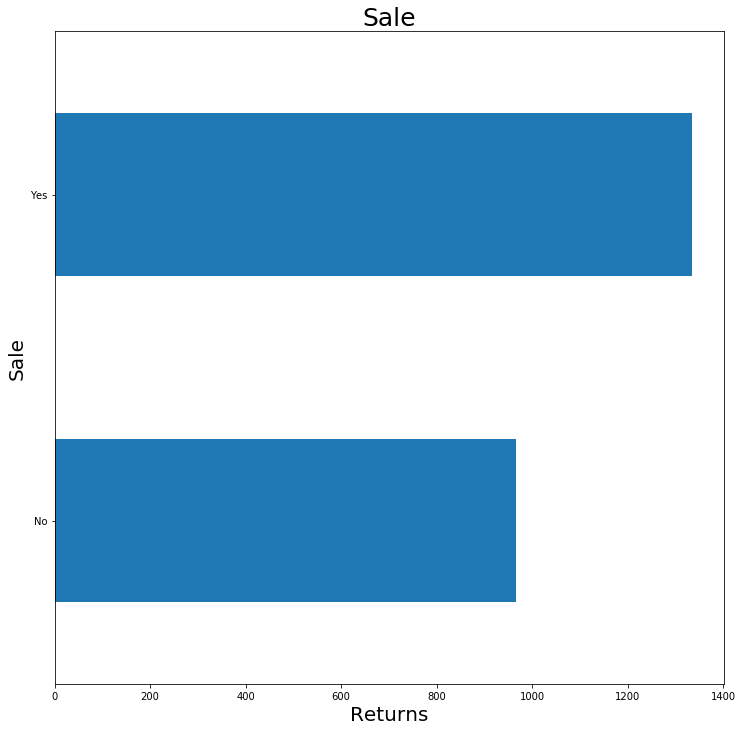

In [19]:
plt.rcParams["figure.figsize"] = [12, 12]
df4.groupby('issale')['returned'].sum().plot.barh()
#df4.plot.scatter(x='returned', y='hasusedwishlist');
#df4['hasusedwishlist'].returned.plot.hist();
plt.title("Sale", size=25)
plt.xlabel("Returns", size=20)
plt.ylabel("Sale", size=20)
